# Exam02

## Exercise01

(739, 850)


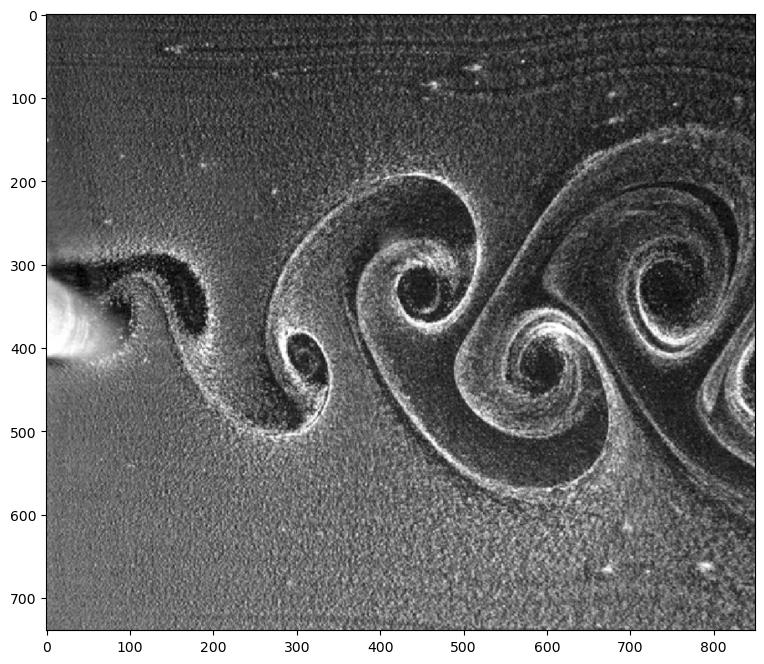

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]
A =imread(os.path.join('./Karaman.png'))
X = np.mean(A,-1); # Convert RGB to grayscale
print(X.shape)
img = plt.imshow(X, cmap='gray')
plt.show()

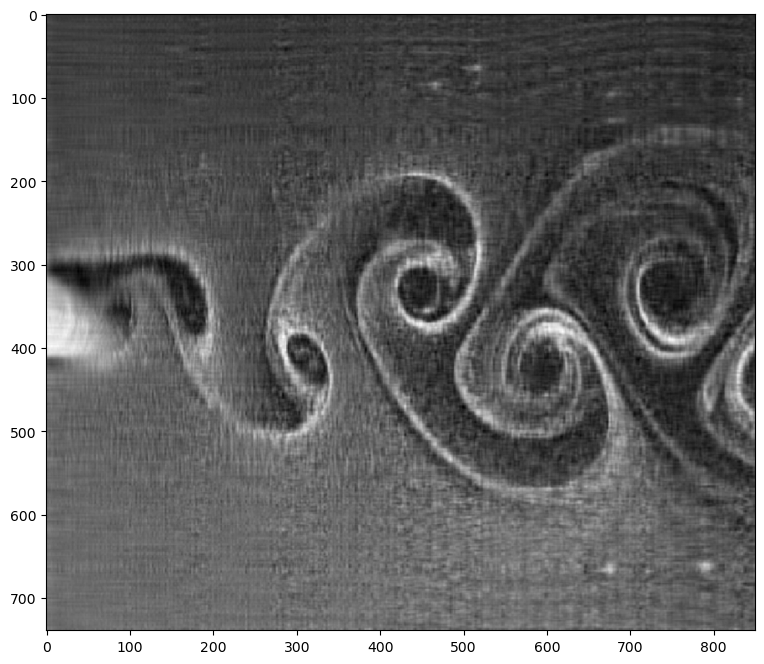

In [17]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
# The lower rank_r approximation can be computed by this function
def approxMat(r):
    # The Economy SVD
    return U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]

img = plt.imshow(approxMat(30), cmap = 'gray')

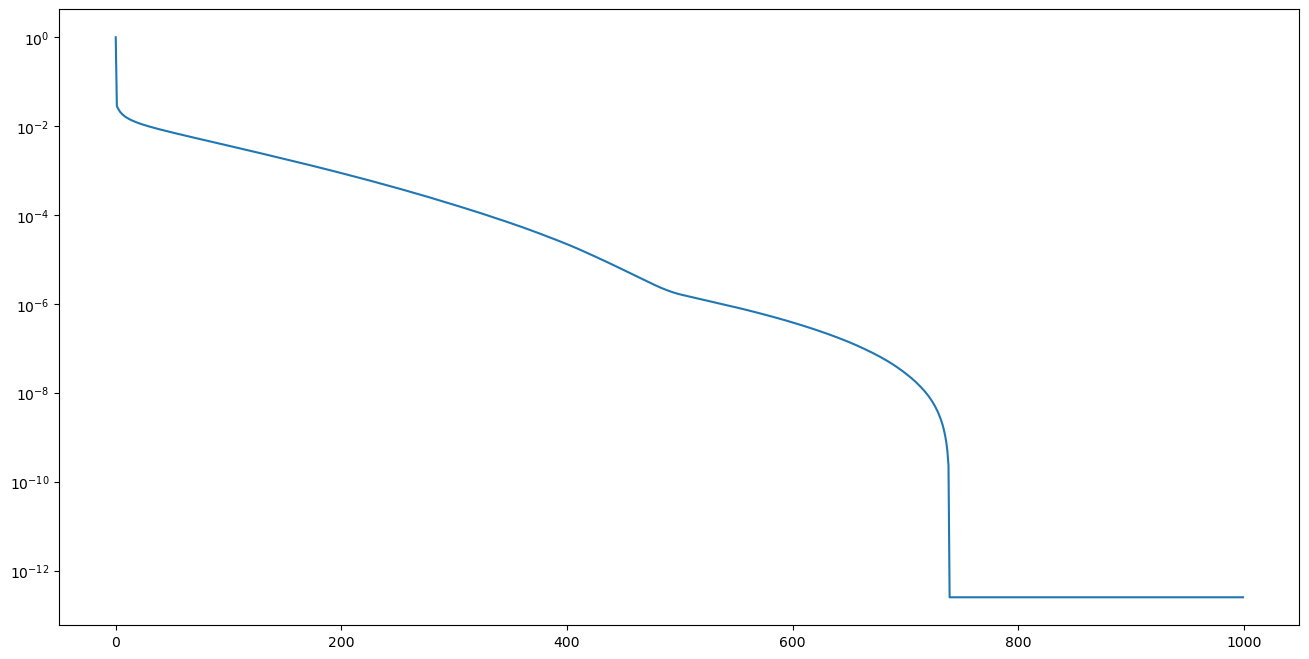

In [22]:
N = 1000
history_norm = []

for i in range(N):
    X_hat = approxMat(i)
    norm_diff = np.linalg.norm(X-X_hat, ord='fro') # Frobenius norm of the diff
    norm_x = np.linalg.norm(X, ord='fro') # Frobenius norm of the matrix
    error = norm_diff/norm_x
    history_norm.append(error**2)

    # the frobenius norm is the sqrt(trace(X*XT)) of the covariance matrix
    # therefore the relative error calculated is the fraction of the missing variance

# the norm history of the 
plt.semilogy(history_norm)


To find the rank for which 99% of the variance is explained we 

1. compute the cumulated sqre sum of the singular values
2. we stop when it exceedes 0.99

(28,)


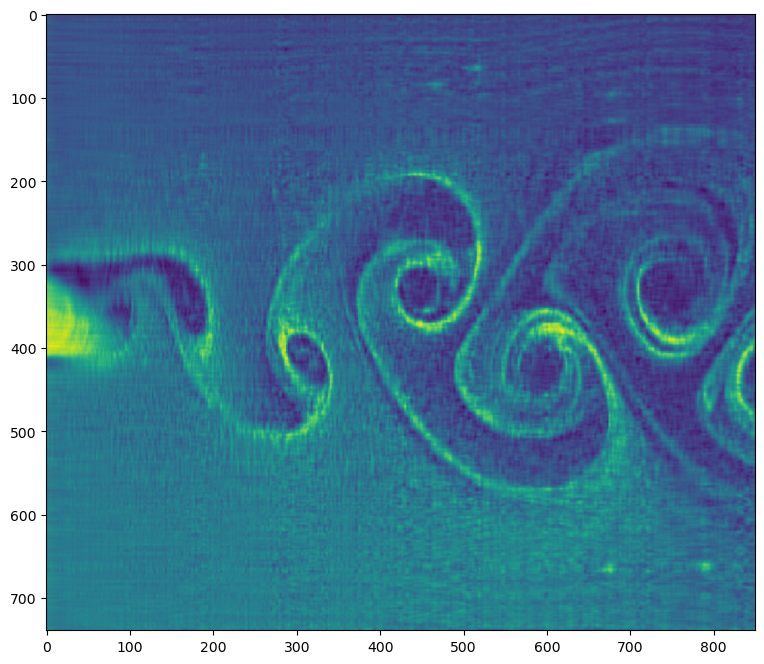

In [31]:
cumsum = np.cumsum(s**2)/np.sum(s**2)
s_99 = s[cumsum <= 0.99]
print(s_99.shape) # prints the singular values explaining 99% of the variance

plt.imshow(approxMat(s_99.shape[0]))

## Exercise 02
Generate 100 artificial data points (xi, yi) where xi is randomly generated in the interval [0, 1] and yi =
cos(4πxi)+ ϵ; ϵ is a random noise in the interval [−0.2, 0.2]. Implement the SGD method to solve the regression
problem for the data you have generated. Use an initial constant learning rate η = 0.001 an train a polynomial
of the form hc = c0 + c1x + c2x2 + . . . + cnxn using your data (n is the maximum degree of the polynomial).
Assume that all the initial parameters ci are randomly generated in [−0.4, 0.4]. Try different values of n. Try
also different values for α to speed up the learning process. Plot the various results and comment them.

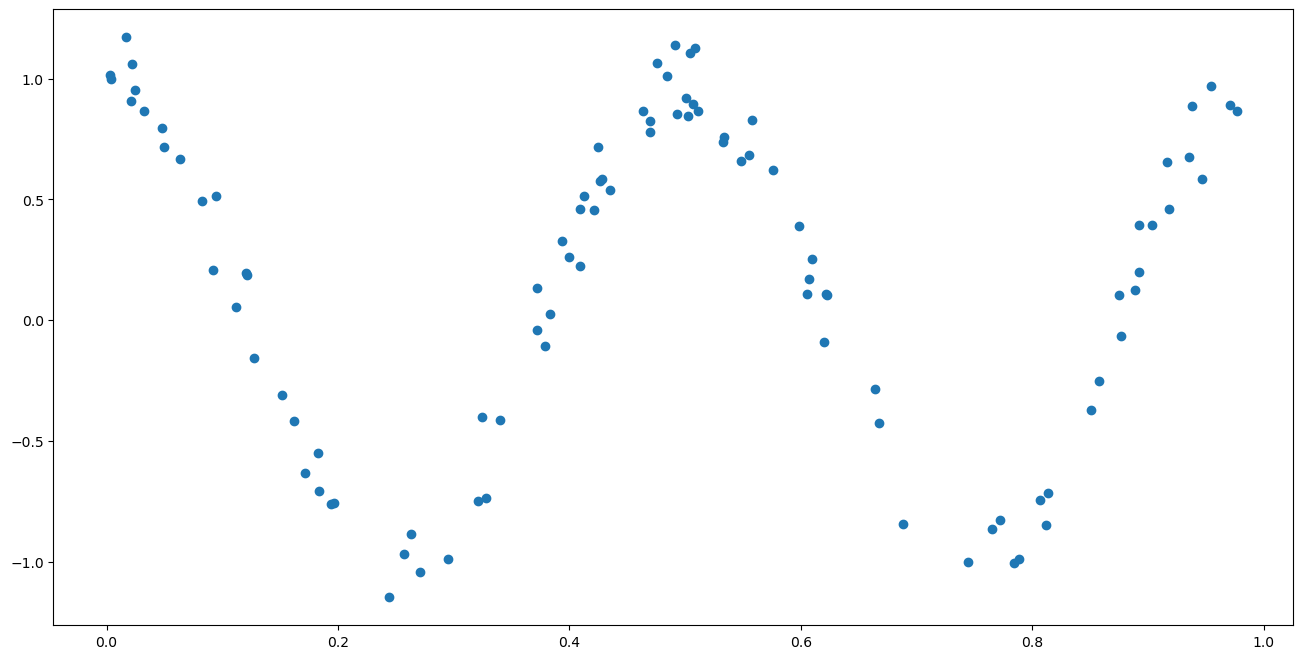

In [4]:
x = np.random.uniform(0, 1, 100)
eps = np.random.uniform(-0.2, 0.2, 100)
y = np.cos(4*np.pi*x) + eps

plt.scatter(x, y)

We will now implement SGD

In [5]:
import jax
import jax.numpy as jnp

n  = 4
X = np.array([x**i for i in range(n)])
params = np.array([2,2,2,2])
print(params @ X[:, :3])
print(x[:3])
print(X.shape)
print(X.T[:3])

[2.92898233 4.41490207 6.38028764]
[0.32476507 0.60951124 0.85072254]
(4, 100)
[[1.         0.32476507 0.10547235 0.03425374]
 [1.         0.60951124 0.37150395 0.22643584]
 [1.         0.85072254 0.72372884 0.61569244]]


In [43]:
def polynomial(x, params):
    # naturally params is a 1xn vector of coefficients
    # we are performing the multiplication params @ X and obtain a 1 x 100 array of the evaluation at those points
    K = jnp.array([x**i for i in range(len(params))]) # the points necessary to the polynomial
    a = jnp.dot(params, K)
    print("results: ", a.shape)
    print("params: ", params.shape)
    return a

In [7]:
def init_params(n):
    return np.random.uniform(-0.4, 0.4, n)

In [27]:
def loss(x, y, params):
    # I am implementing a simple sqare loss function
    error = jnp.abs(polynomial(x, params) - y)
    return jnp.mean(error**2)

In [54]:
def kernel(xi,xj):
  return (xi*xj+1)**n

In [58]:
N = 1000 #epochs
batch_sz = 50 # we use 30 points each time
eta = 0.1 # actually eta
n = 7 # the degree of the polynomial

f_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=-1)) # make sure to compute the gradient on the params

print(x.shape)
print(y.shape)

history_loss = []

params = init_params(n)

for i in range(N):

    idxs = np.random.randint(0, 100, batch_sz) # select 30 random points
    batch = x[idxs]
    labels = y[idxs]

    grads = grad_jit(batch, labels, params)
    #print(grads.shape)

    # we perform the update of the parameters
    for j in range(len(params)):
        params[j] -= eta * grads[i] # stochastic update

    history_loss.append(f_jit(x, y, params))

plt.plot(history_loss)

plt.figure()

plt.scatter(x, y)
plt.scatter(x, polynomial(x, params))
print(params)

(100,)
(100,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(3

KeyboardInterrupt: 

results:  (100,)
params:  (7,)
results:  (100,)
params:  (7,)
[ 0.3860155  -2.18063298  7.48390786 -4.70441523 -7.65691197 -0.92786943
  8.78022904]


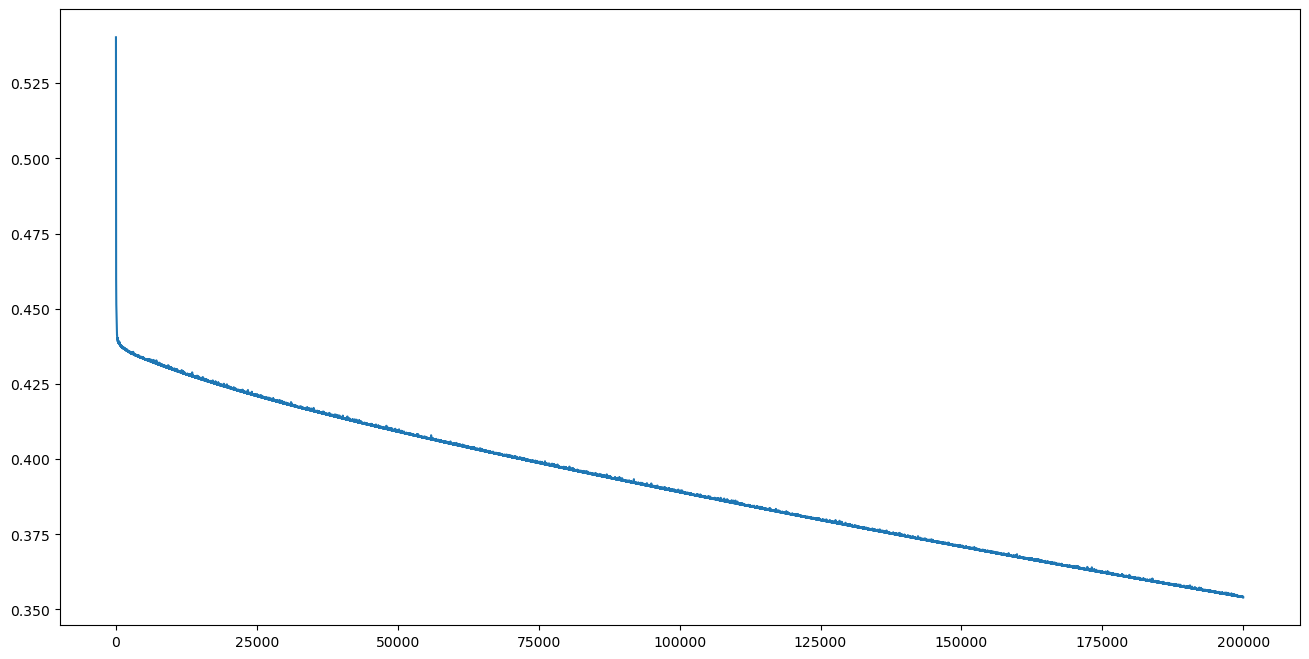

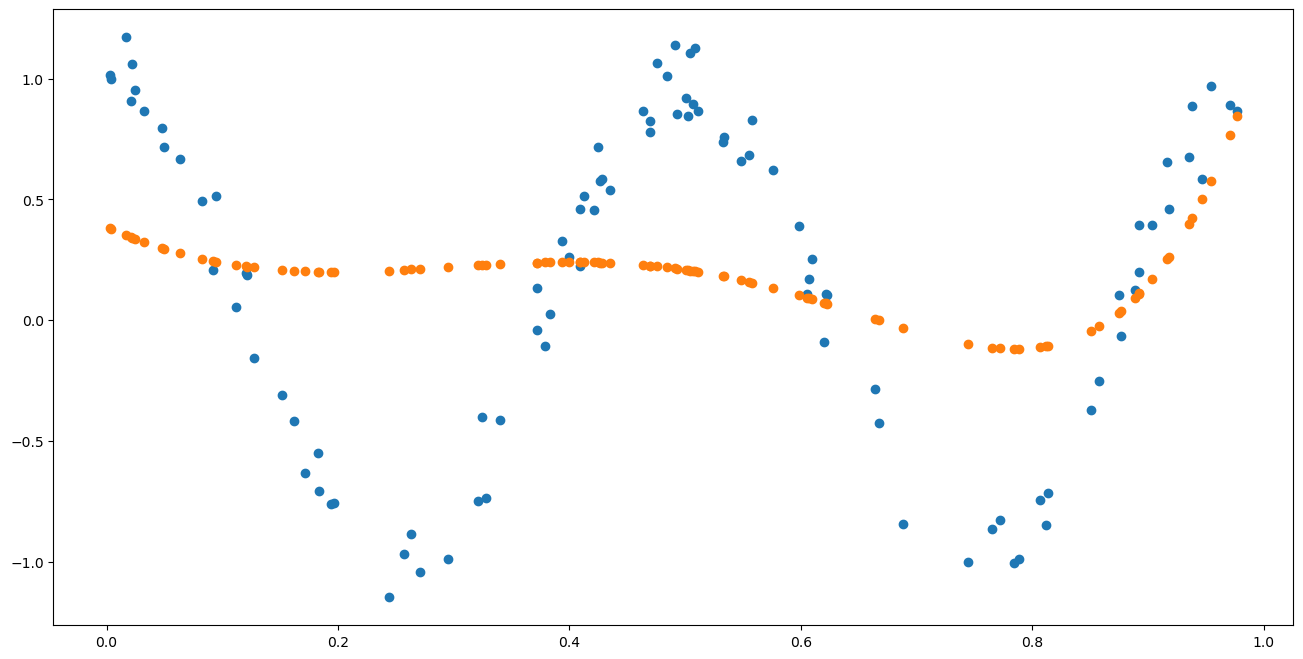

In [47]:
#we try adding momentum

N = 200000 #epochs
batch_sz = 100 # we use 30 points each time
eta = 0.01 # learning rate
alpha = 0.3 # importance of momentum
n = 100 # the degree of the polynomial

f_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=-1)) # make sure to compute the gradient on the params

history_loss = []

params = init_params(n)
velocity = np.zeros(n)

for i in range(N):

    idxs = np.random.randint(0, 100, batch_sz) # select 30 random points
    batch = x[idxs]
    labels = y[idxs]

    grads = grad_jit(batch, labels, params)

    # we perform the update of the parameters
    for j in range(len(params)): # fix the loop variable to avoid overwriting the outer loop variable
        velocity[j] = alpha * velocity[j] - eta * grads[j] # stochastic update
        params[j] += velocity[j] # stochastic update

    history_loss.append(f_jit(x, y, params))

plt.plot(history_loss)

plt.figure()

plt.scatter(x, y)
plt.scatter(x, polynomial(x, params))
print(params)